Task 2:- Movie Recommendation System

Name :- Sushant Borkute

loading libraries into the notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 Load the dataset into a Pandas dataframe

In [2]:
df = pd.read_csv('movies.csv')
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
df.tail()

,movieId,title,genres
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama
10328,149532,Marco Polo: One Hundred Eyes (2015),(no genres listed)


In [4]:
df.drop(['genres'], axis=1)

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015)
10325,146878,Le Grand Restaurant (1966)
10326,148238,A Very Murray Christmas (2015)
10327,148626,The Big Short (2015)


In [7]:
rate = pd.read_csv("ratings.csv")

In [8]:
rate.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [9]:
rate=rate.loc[:,['userId', 'movieId', 'rating']]
rate.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [10]:
df=pd.merge(df,rate)

In [11]:
df.shape

(96693, 5)

In [12]:
df=df.iloc[:1000000]

In [13]:
df.describe()

,movieId,userId,rating
count,96693.000000,96693.000000,96693.000000
mean,15993.980805,325.247608,3.510120
std,29330.123314,182.042720,1.036672
min,1.000000,1.000000,0.500000
25%,1167.000000,177.000000,3.000000
50%,2819.000000,325.000000,3.500000
75%,6967.000000,477.000000,4.000000
max,148626.000000,610.000000,5.000000


In [14]:
df.groupby("title").mean()['rating'].sort_values(ascending=False)

title
True Stories (1986)                                     5.0
Chinese Puzzle (Casse-tête chinois) (2013)              5.0
The Jinx: The Life and Deaths of Robert Durst (2015)    5.0
Idiots and Angels (2008)                                5.0
Bossa Nova (2000)                                       5.0
                                                       ... 
Case 39 (2009)                                          0.5
Baby Boy (2001)                                         0.5
Alone in the Dark (2005)                                0.5
Carabineers, The (Carabiniers, Les) (1963)              0.5
Human Centipede, The (First Sequence) (2009)            0.5
Name: rating, Length: 7219, dtype: float64

In [15]:
df.groupby("title").count()["rating"].sort_values(ascending=False)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
                                            ... 
Love Serenade (1996)                           1
Love and Death on Long Island (1997)           1
Love and Other Catastrophes (1996)             1
Love and a .45 (1994)                          1
À nous la liberté (Freedom for Us) (1931)      1
Name: rating, Length: 7219, dtype: int64

data frame in which we will have rating and number of ratings column

In [16]:
ratings=pd.DataFrame(df.groupby("title").mean()['rating'])
ratings['number of ratings']=pd.DataFrame(df.groupby("title").count()["rating"])

In [17]:
ratings.sort_values(by='rating',ascending=False)

,rating,number of ratings
title,,
True Stories (1986),5.0,1
Chinese Puzzle (Casse-tête chinois) (2013),5.0,1
The Jinx: The Life and Deaths of Robert Durst (2015),5.0,1
Idiots and Angels (2008),5.0,1
Bossa Nova (2000),5.0,1
...,...,...
Case 39 (2009),0.5,1
Baby Boy (2001),0.5,1
Alone in the Dark (2005),0.5,1


In [18]:
ratings.describe()

,rating,number of ratings
count,7219.000000,7219.000000
mean,3.268290,13.394237
std,0.770307,25.271137
min,0.500000,1.000000
25%,2.863636,2.000000
50%,3.384615,4.000000
75%,3.833333,13.000000
max,5.000000,329.000000


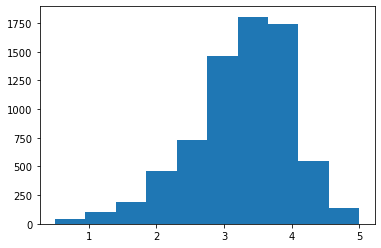

In [19]:
plt.hist(ratings['rating'])
plt.show()

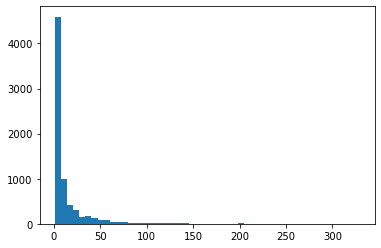

In [20]:
plt.hist(ratings['number of ratings'],bins=50)
plt.show()

 Making a pivot table

In [21]:
pivot_table=df.pivot_table(index=["userId"],columns=["title"],values="rating")
pivot_table.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,Zoolander (2001),Zulu (1964),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
pivot_table.shape

(610, 7219)

In [23]:
def recommend_movie(movie):
    movie_watched=pivot_table[movie]
    similarity_movie=pivot_table.corrwith(movie_watched)
    #find the correlation between the movies
    similarity_movie=similarity_movie.sort_values(ascending=False)
    return similarity_movie.head()

In [24]:
recommend_movie('Beautiful Girls (1996)')

C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
¡Three Amigos! (1986)    1.0
Core, The (2003)         1.0
Ring, The (2002)         1.0
Risky Business (1983)    1.0
Road House (1989)        1.0
dtype: float64